In [120]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures

from scipy import stats

## Antes daqui, vem o tratamento

In [2]:
from google.colab import drive
drive.mount('/content/drive')
cars = pd.read_csv('/content/drive/MyDrive/colab/clean_auto_df.csv')

Mounted at /content/drive


### Iniciando um problema de regressão

##### TODO

- Verificar a fórmula de CITY-MPG
- Criar dummies das variaveis categoricas

### Definindo a variável dependente/target

 - price

In [3]:
cars.corr()

,Unnamed: 0,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,...,horsepower,peak-rpm,city-mpg,highway-L/100km,price,city-L/100km,fuel-type-diesel,fuel-type-gas,aspiration-std,aspiration-turbo
Unnamed: 0,1.000000,-0.162764,-0.241092,0.125517,0.161848,0.043976,0.252015,0.064820,-0.047764,0.244734,...,-0.022505,-0.195662,0.027956,-0.078346,-0.118214,-0.099157,0.121454,-0.121454,-0.082739,0.082739
symboling,-0.162764,1.000000,0.466264,-0.535987,-0.365404,-0.242423,-0.550160,-0.233118,-0.110581,-0.140019,...,0.075810,0.279740,-0.035527,-0.029807,-0.082391,0.066171,-0.196735,0.196735,0.054615,-0.054615
normalized-losses,-0.241092,0.466264,1.000000,-0.056661,0.019424,0.086802,-0.373737,0.099404,0.112360,-0.029862,...,0.217300,0.239543,-0.225016,0.181189,0.133999,0.238567,-0.101546,0.101546,0.006911,-0.006911
wheel-base,0.125517,-0.535987,-0.056661,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.493244,...,0.371178,-0.360305,-0.470606,0.577576,0.584642,0.476153,0.307237,-0.307237,-0.256889,0.256889
length,0.161848,-0.365404,0.019424,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.608971,...,0.579795,-0.285970,-0.665192,0.707108,0.690628,0.657373,0.211187,-0.211187,-0.230085,0.230085
width,0.043976,-0.242423,0.086802,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.544885,...,0.615056,-0.245800,-0.633531,0.736728,0.751265,0.673363,0.244356,-0.244356,-0.305732,0.305732
height,0.252015,-0.550160,-0.373737,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694,0.180449,...,-0.087001,-0.309974,-0.049800,0.084301,0.135486,0.003811,0.281578,-0.281578,-0.090336,0.090336
curb-weight,0.064820,-0.233118,0.099404,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,0.644060,...,0.757981,-0.279361,-0.749543,0.836921,0.834415,0.785353,0.221046,-0.221046,-0.321955,0.321955
engine-size,-0.047764,-0.110581,0.112360,0.572027,0.685025,0.729436,0.074694,0.849072,1.000000,0.572609,...,0.822668,-0.256733,-0.650546,0.783465,0.872335,0.745059,0.070779,-0.070779,-0.110040,0.110040
bore,0.244734,-0.140019,-0.029862,0.493244,0.608971,0.544885,0.180449,0.644060,0.572609,1.000000,...,0.566903,-0.267392,-0.582027,0.559112,0.543155,0.554610,0.054458,-0.054458,-0.227816,0.227816


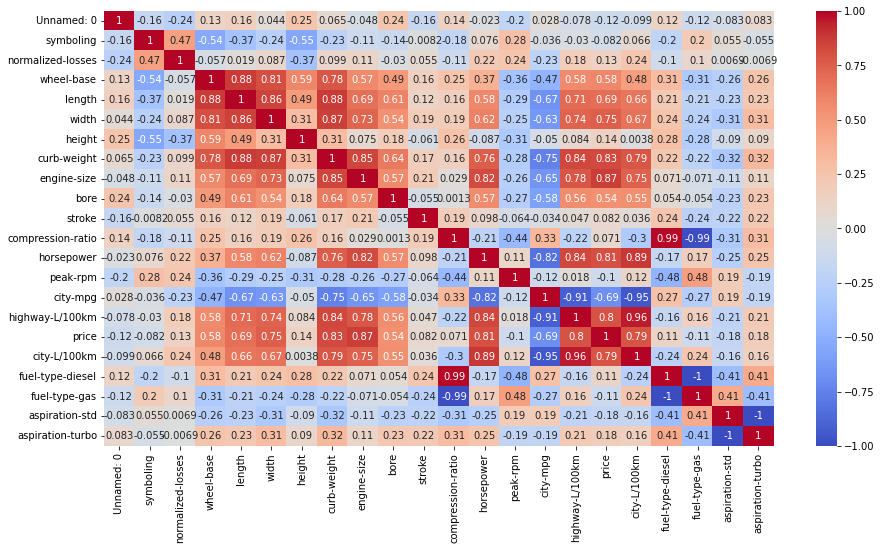

In [4]:
plt.figure(figsize=(15,8))
sns.heatmap(cars.corr(), annot=True, cmap='coolwarm')

In [5]:
cars_selected = cars[['city-L/100km', 'horsepower', 'engine-size', 'curb-weight', 'width', 'length', 'bore', 'price']]

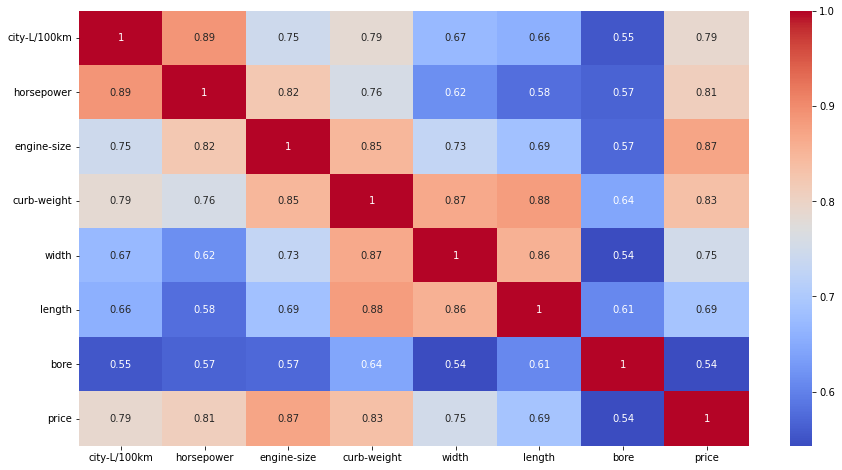

In [ ]:
plt.figure(figsize=(15,8))
sns.heatmap(cars_selected.corr(), annot=True, cmap='coolwarm')

In [6]:
cars_simple = cars_selected[['engine-size', 'price']]
cars_multiple = cars_selected[['city-L/100km', 'engine-size', 'width', 'length', 'price']]

In [7]:
cars_simple.head()

,engine-size,price
0,130,13495.0
1,130,16500.0
2,152,16500.0
3,109,13950.0
4,136,17450.0


In [ ]:
cars_multiple.head()

,city-L/100km,engine-size,width,length,price
0,11.190476,130,64.1,168.8,13495.0
1,11.190476,130,64.1,168.8,16500.0
2,12.368421,152,65.5,171.2,16500.0
3,9.791667,109,66.2,176.6,13950.0
4,13.055556,136,66.4,176.6,17450.0


In [8]:
def testP(a, b):
  #expected < 0.05
  pearson_coef, p_value = stats.pearsonr(a, b)
  print('Coeficiente de Pearson: ', pearson_coef)
  print('P-value: ', p_value)


In [9]:
testP(cars_simple['engine-size'], cars_simple['price'])

Coeficiente de Pearson:  0.8723351674455185
P-value:  9.265491622198389e-64


In [10]:
for column in cars_multiple.columns[:-1]:
  print(column)
  testP(cars_multiple[column], cars_multiple['price'])
  print('\n')

city-L/100km
Coeficiente de Pearson:  0.7898975136626943
P-value:  3.903106400939802e-44


engine-size
Coeficiente de Pearson:  0.8723351674455185
P-value:  9.265491622198389e-64


width
Coeficiente de Pearson:  0.7512653440522674
P-value:  9.200335510481516e-38


length
Coeficiente de Pearson:  0.6906283804483639
P-value:  8.016477466159328e-30




# Simples

### Train Test Split

In [55]:
X = cars_simple[['engine-size']]
Y = cars_simple['price']

In [91]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

### Modelo

In [92]:
lr = LinearRegression()

In [93]:
lr.fit(X_train, Y_train)

LinearRegression()

In [94]:
YHat = lr.predict(X_test)

### Erros

In [95]:
def errors(Y, YHat):
  r2 = r2_score(Y, YHat)
  mse = mean_squared_error(Y, YHat)
  rmse = np.sqrt(mse)
  mae = mean_absolute_error(Y, YHat)

  print('R2: ', r2)
  print('Mean Squared Error: ', mse)
  print('Root Mean Squared Error: ', rmse)
  print('Mean Absolute Error: ', mae)

In [96]:
errors(Y_test, YHat)

R2:  0.7326636495555969
Mean Squared Error:  25341255.964799404
Root Mean Squared Error:  5034.0099289532
Mean Absolute Error:  3578.6030320861496


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


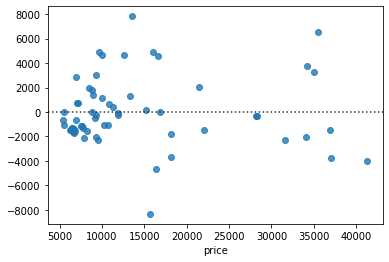

In [97]:
sns.residplot(Y_test, YHat)
plt.show()

# Multipla

In [98]:
cars_multiple.head()

,city-L/100km,engine-size,width,length,price
0,11.190476,130,64.1,168.8,13495.0
1,11.190476,130,64.1,168.8,16500.0
2,12.368421,152,65.5,171.2,16500.0
3,9.791667,109,66.2,176.6,13950.0
4,13.055556,136,66.4,176.6,17450.0


In [99]:
X = cars_multiple[['city-L/100km', 'engine-size', 'width', 'length']]
Y = cars_multiple['price']

In [100]:
X.head()

,city-L/100km,engine-size,width,length
0,11.190476,130,64.1,168.8
1,11.190476,130,64.1,168.8
2,12.368421,152,65.5,171.2
3,9.791667,109,66.2,176.6
4,13.055556,136,66.4,176.6


### Normalização

In [102]:
std_scaler = StandardScaler()

### Train Test Split

In [29]:
# Erro
# X_scaled = std_scaler.fit_transform(X)

In [112]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42) 

In [113]:
X_train_scaled = std_scaler.fit_transform(X_train)
X_test_scaled = std_scaler.fit_transform(X_test)

### Modelo

In [114]:
mlr = LinearRegression()

In [115]:
mlr.fit(X_train_scaled, Y_train)

LinearRegression()

In [116]:
YHat = mlr.predict(X_test_scaled)

### Erros

In [117]:
errors(Y_test, YHat)

R2:  0.7325172213655088
Mean Squared Error:  25355136.135750033
Root Mean Squared Error:  5035.388379832288
Mean Absolute Error:  3307.5681214213705


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


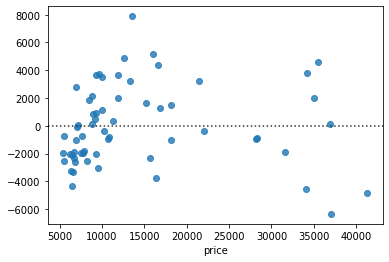

In [118]:
sns.residplot(Y_test, YHat)
plt.show()

# Polinomial

In [119]:
X = cars_multiple[['city-L/100km', 'engine-size', 'width', 'length']]
Y = cars_multiple['price']

In [137]:
plr = PolynomialFeatures(degree=3)

#### Train Test Split + Normalização + Polinomial

In [138]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42) 

In [157]:
std_scaler = StandardScaler()

In [158]:
X_train_scaled = std_scaler.fit_transform(X_train)
X_test_scaled = std_scaler.fit_transform(X_test)

In [159]:
X_train_pr = plr.fit_transform(X_train_scaled)
X_test_pr = plr.fit_transform(X_test_scaled)

### Modelo

In [160]:
lrp = LinearRegression()

In [161]:
lrp.fit(X_train_pr, Y_train)

LinearRegression()

In [162]:
YHat = lrp.predict(X_test_pr)

#### Erros

In [163]:
errors(Y_test, YHat)

R2:  0.8289316142063257
Mean Squared Error:  16215855.960763212
Root Mean Squared Error:  4026.8916003244008
Mean Absolute Error:  2631.6897743790414


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


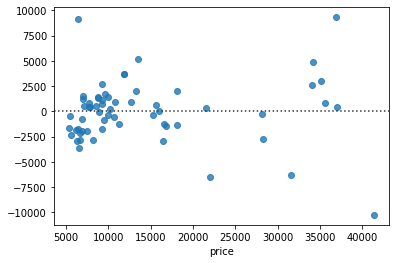

In [164]:
sns.residplot(Y_test, YHat)
plt.show()

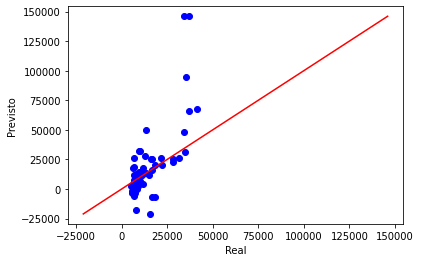

In [156]:
plt.scatter(Y_test, YHat, c='b')
p1 = max(max(YHat), max(Y_test))
p2 = min(min(YHat), min(Y_test))
plt.plot([p1, p2], [p1, p2], 'r-')
plt.xlabel('Real')
plt.ylabel('Previsto')
plt.show()

# Pipelines

In [165]:
from sklearn.pipeline import Pipeline

In [166]:
Input = [
    ('scale', StandardScaler()),
    ('polynomial', PolynomialFeatures(degree=3)),
    ('model', LinearRegression())
]

In [167]:
pipe = Pipeline(Input)

In [168]:
pipe

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(degree=3)),
                ('model', LinearRegression())])

In [169]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42) 

In [170]:
pipe.fit(X_train, Y_train)

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(degree=3)),
                ('model', LinearRegression())])

In [171]:
YHat = pipe.predict(X_test)

In [172]:
errors(Y_test, YHat)

R2:  0.7213857251541439
Mean Squared Error:  26410309.120248664
Root Mean Squared Error:  5139.09613845165
Mean Absolute Error:  3037.745907956739
